In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
df = pd.read_csv("data/fraud_oracle.csv")
df.head()

### Examining the data (General)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

#### Display all of the unique values for each feature

In [ ]:
# Displaying the unique values in each column of the df
for column in df:
    print(column,":\n",df[column].unique())
    print("="*50,end="\n\n")

#### Display the features with missing values along with the % of values missing

In [ ]:
# Loops through the data in the df and prints out the number of unique values in each column
for i in df.columns:
    if i != 'FraudFound_P':
        missing_values = df[i].isna().sum() + len(df[df[i]=='none']) + len(df[df[i]=='0'])
        missing_percent = round((missing_values/len(df))*100,2)
        if missing_percent > 0:
            print(f'{i}: ',end="-"*20)
            print(f'{missing_percent}%')

In [ ]:
'''
For PastNumberOfClaims and NumberOfSuppliments: 'none' counts as a value and is important 
so we won't drop these, but drop everything else
'''

df.drop(df[df['Days_Policy_Claim'] == 'none'].index, inplace=True)
df.drop(df[df['Days_Policy_Accident'] == 'none'].index, inplace=True)

df.drop(df[df['DayOfWeekClaimed'] == '0'].index, inplace=True)
df.drop(df[df['MonthClaimed'] == '0'].index, inplace=True)

### Examining the data (Detailed)

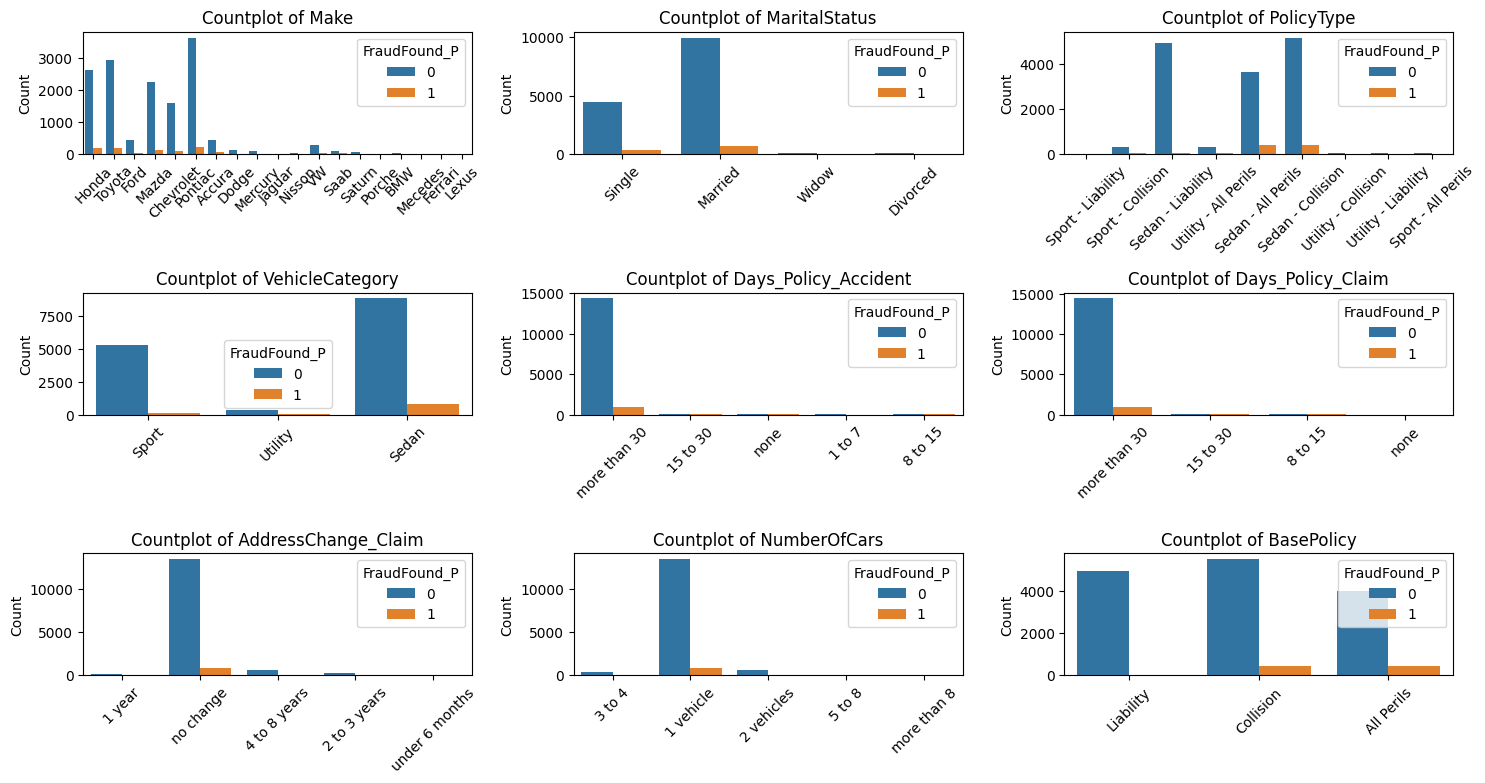

In [28]:
features = [i  for i in df.columns if df[i].dtype==object and i != 'FraudFound_P']

# Calculate the number of rows and columns for the grid
num_rows = 8
num_cols = 3

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in the subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [30]:
'''
For some of the features, one category occurs much more frequently than the others.
So we will check the percentage of occurences for each category for a given feature.
'''

for i in features:
    print(round(df[i].value_counts()/len(df)*100,2))
    print("="*40)

Make
Pontiac      24.88
Toyota       20.24
Honda        18.16
Mazda        15.27
Chevrolet    10.90
Accura        3.06
Ford          2.92
VW            1.84
Dodge         0.71
Saab          0.70
Mercury       0.54
Saturn        0.38
Nisson        0.19
BMW           0.10
Jaguar        0.04
Porche        0.03
Mecedes       0.03
Ferrari       0.01
Lexus         0.01
Name: count, dtype: float64
MaritalStatus
Married     68.90
Single      30.38
Divorced     0.49
Widow        0.23
Name: count, dtype: float64
PolicyType
Sedan - Collision       36.21
Sedan - Liability       32.34
Sedan - All Perils      26.50
Sport - Collision        2.26
Utility - All Perils     2.20
Utility - Collision      0.19
Sport - All Perils       0.14
Utility - Liability      0.14
Sport - Liability        0.01
Name: count, dtype: float64
VehicleCategory
Sedan      62.72
Sport      34.75
Utility     2.54
Name: count, dtype: float64
Days_Policy_Accident
more than 30    98.88
none             0.36
8 to 15          0.36
1

#### Removing categories with low frequencies within features 

In [ ]:
'''
We will remove categories that occur less than 7% of the time for each feaure
If there is only 1 category after removal, then the feature will be dropped 
'''

df = df.copy(deep=True)
for feature in features:
    value_percent = round(df[feature].value_counts()/len(df)*100,2)
    values_to_remove = value_percent[value_percent <= 7].index
    df = df[~df[feature].isin(values_to_remove)]
    
for feature in features:
    unique_classes = df[feature].nunique()
    if unique_classes <= 1:
        df.drop(columns=[feature], inplace=True)

In [ ]:
features = [i  for i in df.columns if df[i].dtype==object and i != 'FraudFound_P']
num_rows = 8
num_cols = 3

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in the subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Feature Engineering (Applying Frequency Encoding)

In [ ]:
def frequency_encoder(df):
    # Encode the binary features wihin our data
    binary_features = [i for i in df.columns if df[i].nunique() == 2]

    label_encoder = LabelEncoder()

    for feature in binary_features:
        df[feature] = label_encoder.fit_transform(df[feature])
        
    
    '''
    This code calculates and applies frequency encoding to the specified columns (months_weeks) 
    based on the occurrence of each category in the dataset for both classes of the target variable 
    (FraudFound_P = 1 and FraudFound_P = 0). The calculated frequency encoding values are then mapped 
    to the respective columns in the DataFrame. This technique can be used to encode categorical 
    features based on the relative frequencies of their categories in different target classes.

    '''

    # Perform frequency encoding here
    months_weeks = ['WeekOfMonth', 'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed']


    for column in months_weeks:
        # Calculate the frequency of each category for FraudFound_P=1 and FraudFound_P=0
        freq_1 = df[df['FraudFound_P'] == 1].groupby(column).size() / len(df)
        freq_0 = df[df['FraudFound_P'] == 0].groupby(column).size() / len(df)

        '''
        Calculate the frequency encoding value using the formula (15 * freq_1 + freq_0) / 2
        Within the formula 15 works best, other similar values can be used as well,
        but it really depends on the data that you're working with
        '''

        freq_encoding = (15 * freq_1 + freq_0) / 2

        # Replace the previous values with the frequency encoded values
        df[column] = df[column].map(freq_encoding)
        

    # Encoding AgeOfVehicle
    age_mapping = {
        '7 years': 2,
        '6 years': 1,
        'more than 7': 3,  
        '5 years': 0
    }

    df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_mapping)


    # Encoding PastNumberOfClaims
    claim_mapping = {
        '2 to 4': 2,
        'none': 0,
        '1': 1,
        'more than 4': 3
    }

    df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(claim_mapping)


    # Encoding AgeOfPolicyHolder
    age_mapping = {
        '31 to 35': 0,
        '36 to 40': 1,
        '41 to 50': 2,
        '51 to 65': 3
    }

    df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(age_mapping)


    # Encoding NumberOfSuppliments
    suppliments_mapping = {
        'none': 0,
        'more than 5': 3,
        '1 to 2': 1,
        '3 to 5': 2
    }

    df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(suppliments_mapping)


    # Encoding VehiclePrice
    encoding_mp = {
        '20000 to 29000': 1,
        'more than 69000': 3,
        '30000 to 39000': 2,
        'less than 20000': 0
    }
    df['VehiclePrice'] = df['VehiclePrice'].map(encoding_mp)

In [ ]:
frequency_encoder(df)